In [60]:
#Importar o Pandas e Pathlib

import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

## Criar DF e Adicionar coluna de mês e ano

In [61]:
meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5,'jun': 6,'jul': 7,'ago': 8,'set': 9, 'out': 10,'nov': 11,'dez': 12}

caminho = pathlib.Path('archive')

base_airbnb = pd.DataFrame()

for arquivo in caminho.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    
    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv',''))
    
    df = pd.read_csv(caminho / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    base_airbnb = base_airbnb.append(df)
    
display(base_airbnb)

C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\2355717780.py:14: DtypeWarning:

Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\2355717780.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\2355717780.py:14: DtypeWarning:

Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\2355717780.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\2355717780.py:14: DtypeWarning:

Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\2355717780.py:17

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36373,33014188,https://www.airbnb.com/rooms/33014188,20190313042552,2019-03-13,Ótimo apartamento à 3 ruas da praia,NaN,NaN,"O bairro é simplesmente maravilhoso, a 5min a ...",none,"O bairro é simplesmente maravilhoso, a 5min a ...",...,3.0,3.0,1125.0,1125.0,3.0,1125.0,0.0,1.0,0.0,0.0
36374,33014427,https://www.airbnb.com/rooms/33014427,20190313042552,2019-03-13,Maravilhoso Apto Com Vista Total Do Mar!!,"Apartamento recém reformado, novinho e pronto ...",NaN,"Apartamento recém reformado, novinho e pronto ...",none,NaN,...,2.0,2.0,60.0,60.0,2.0,60.0,0.0,1.0,0.0,0.0
36375,33016673,https://www.airbnb.com/rooms/33016673,20190313042552,2019-03-13,Próximo metrô largo do Machado e catete,NaN,NaN,"Próximo ao metrô largo do Machado e catete, me...",none,"Próximo ao metrô largo do Machado e catete, me...",...,1.0,1.0,5.0,5.0,1.0,5.0,0.0,1.0,0.0,0.0
36376,33021915,https://www.airbnb.com/rooms/33021915,20190313042552,2019-03-13,"Aconchegante apt no posto 2, 100m praia, vista...",NaN,NaN,NaN,none,NaN,...,2.0,2.0,25.0,25.0,2.0,25.0,0.0,23.0,0.0,0.0


- Como temos muitas colunas, nosso modelo pode acabar ficando muito lento
- Além disso, uma análise rápida permite ver que várias colunas não são necessárias para o nosso modelo de revisão, por isso, vamos excluir algumas colunas da nossa base

- Tipo de colunas que vamos excluir:

    1. ID's, links e informações não relevantes para gerar o modelo
    2. Colunas repetidas ou extremamente parecidas com outra
   
   
- Para isso, vamos criar um arquivo em excel com os 1000 primeiros registros e fazer uma análise qualitativa

In [62]:
base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep = ';')

- Depois da análise qualitativa, levando em conta os critérios indicados acima, ficamos com as seguintes colunas

In [63]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb = base_airbnb.loc[:,colunas]

display(base_airbnb)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,...,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,...,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4
2,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
3,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
4,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36373,NaN,NaN,f,1.0,-23.026120,-43.464980,Condominium,Entire home/apt,6,2.5,...,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,3
36374,NaN,NaN,f,1.0,-23.010490,-43.363810,Apartment,Entire home/apt,6,1.0,...,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,3
36375,NaN,NaN,f,1.0,-22.927950,-43.175680,Apartment,Entire home/apt,2,1.0,...,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,3
36376,within a few hours,84%,f,34.0,-22.962480,-43.174470,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,3


## Tratamento de fatores faltantes

- Visualizando o DataFrame, pode-se perceber a grande quantidade de valores nulos, por isso, toda coluna com mais de 200000 linhas nulas, foram excluídas

- Para outras colunas, como temos muitos dados, foram excluídas somente as linhas nulas

In [64]:
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 200000:
        base_airbnb = base_airbnb.drop(coluna,axis = 1)

base_airbnb = base_airbnb.dropna()

print(base_airbnb.isnull().sum())


host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


## Tratando os dados de cada coluna do DataFrame

- vamos verificar cada dados e se eles correspondem com os itens das colunas

In [65]:
print(base_airbnb.dtypes)
print('-'*77)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
-----------------------------------------------------------------------------
host_is_superhost                                                           f
ho

- Com a coluna de preço e de extra people estão reconhecidas como objetos (ao invés de float), vamos mudar o tipo de variável da coluna

In [66]:
#price
base_airbnb['price'] = base_airbnb['price'].str.replace('$','')
base_airbnb['price'] = base_airbnb['price'].str.replace(',','')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy = False)
#extra people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$','')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',','')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy = False)

print(base_airbnb.dtypes)

C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\197606844.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\197606844.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


## Análise Exploratória e Outliers

- Olharemos feature por feature para podermos:

    1. Ver a correlação entre as features e decidir se vale a pena manter todas
    2. Excluir outliers (regra utilizada, valores abaixo de Q1 - 1.5xAmplitude e valores acima de Q3 + 1.5xAmplitude), sabendo        que a Amplitude = Q3 - Q1
    3. Verificar se todas as features que temos fazemo realmente sentido para o nosso modelo ou se devemos excluir alguma
    
- Vamos começar pelas colunas de preço e de extra_people, pois esses são os valores numéricos contínuos

C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\3655389631.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



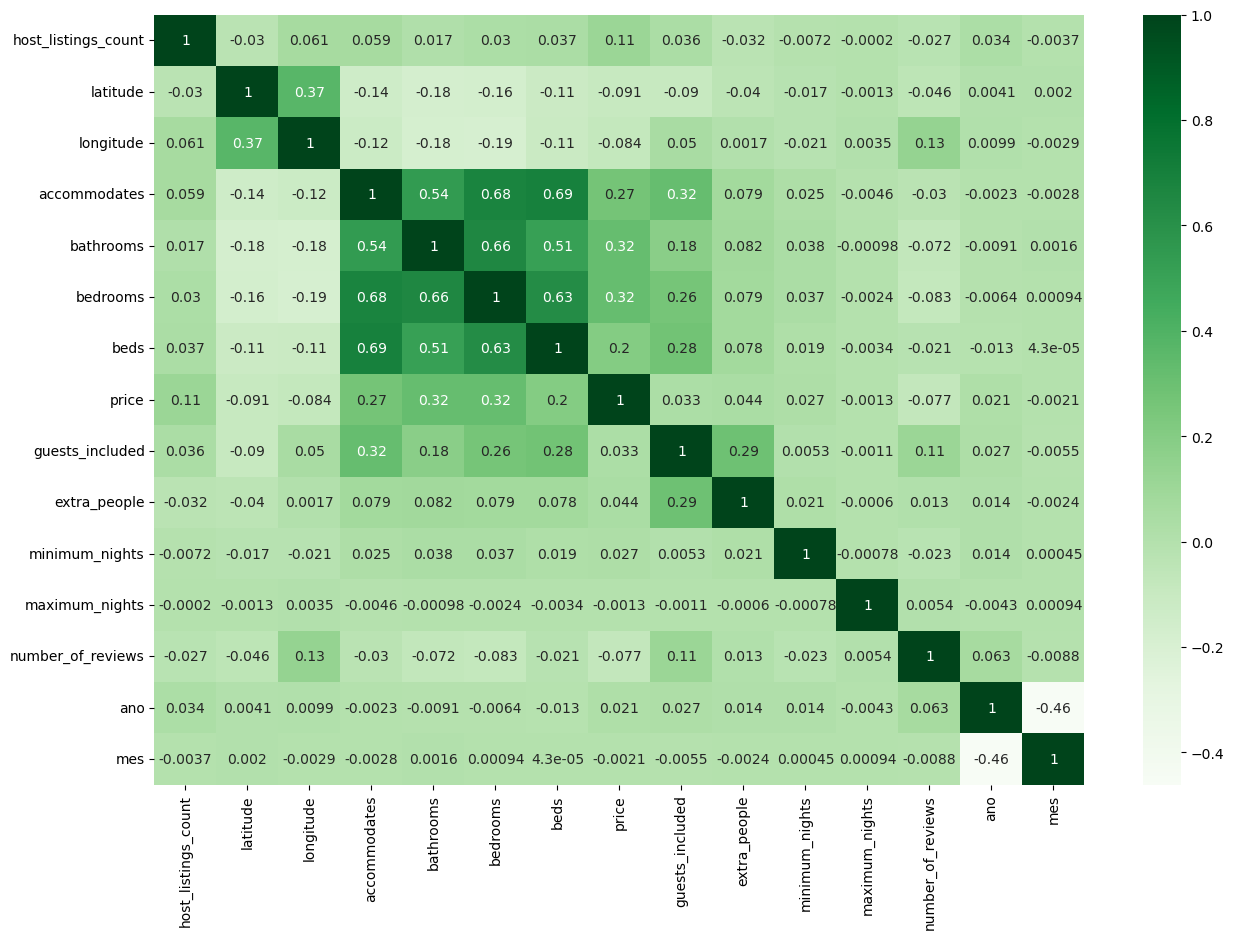

In [67]:
plt.figure(figsize = (15,10));
sns.heatmap(base_airbnb.corr(),annot = True, cmap = 'Greens');

### Definição de Funções para Análise de Outliers

In [68]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df,coluna):
    qntd_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[coluna])
    df = df.loc[(df[coluna] >= lim_inf) & (df[coluna] <= lim_sup),:]
    linhas_removidas = qntd_linhas - df.shape[0]
    return df, linhas_removidas

In [69]:
def diagrama_caixa(coluna):
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15,5))
    sns.distplot(coluna,hist=True)
    
def grafico_barra(coluna):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=coluna.value_counts().index,y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

In [70]:
base_airbnb['host_listings_count'].value_counts()

1.0       349549
2.0       109215
3.0        44429
4.0        25495
5.0        15857
           ...  
103.0          1
1145.0         1
99.0           1
116.0          1
112.0          1
Name: host_listings_count, Length: 168, dtype: int64

C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\1675347531.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




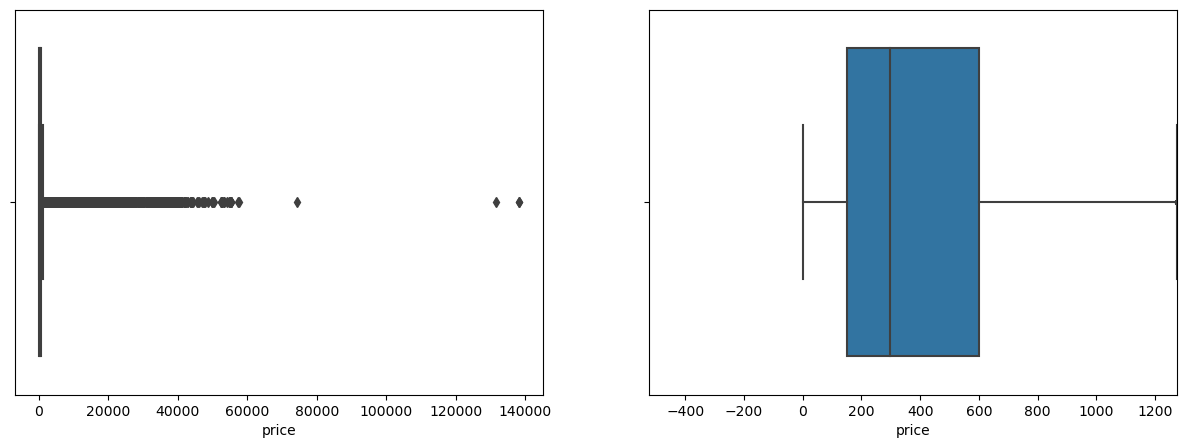

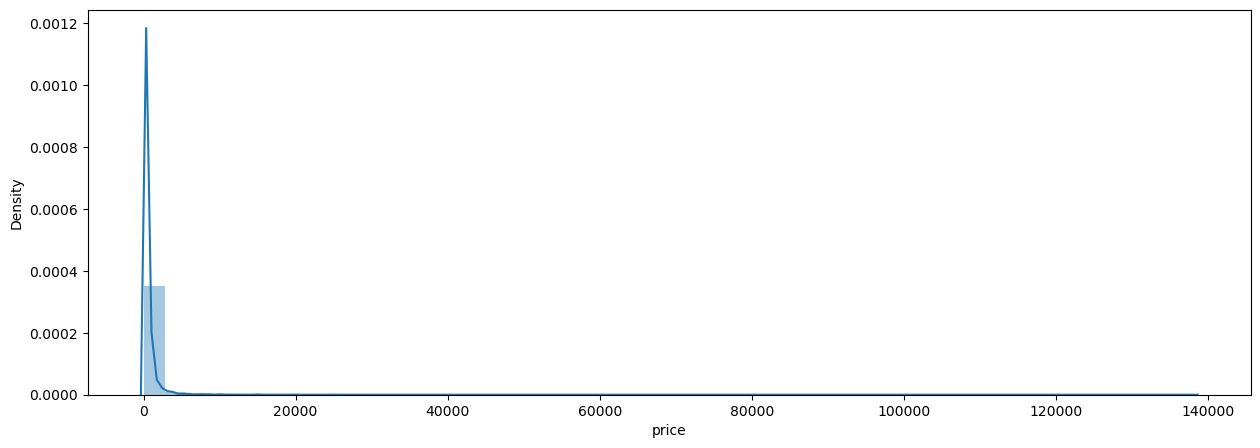

In [71]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

In [72]:
base_airbnb, linhas_removidas  = excluir_outliers(base_airbnb,'price')
print(f'Foram removidas {linhas_removidas} linhas')

Foram removidas 63253 linhas


C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\1675347531.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




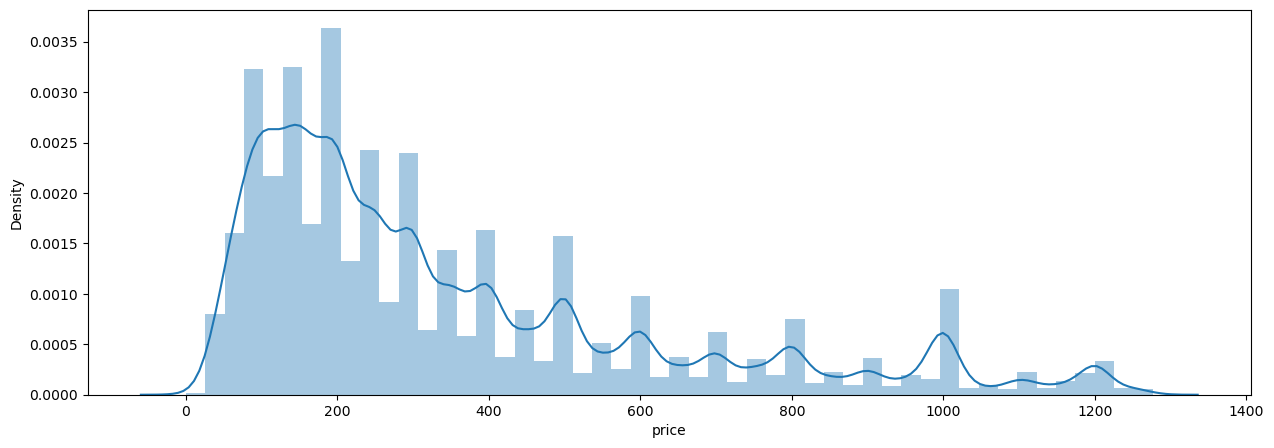

In [73]:
histograma(base_airbnb['price'])

### extra_people()

C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\1675347531.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




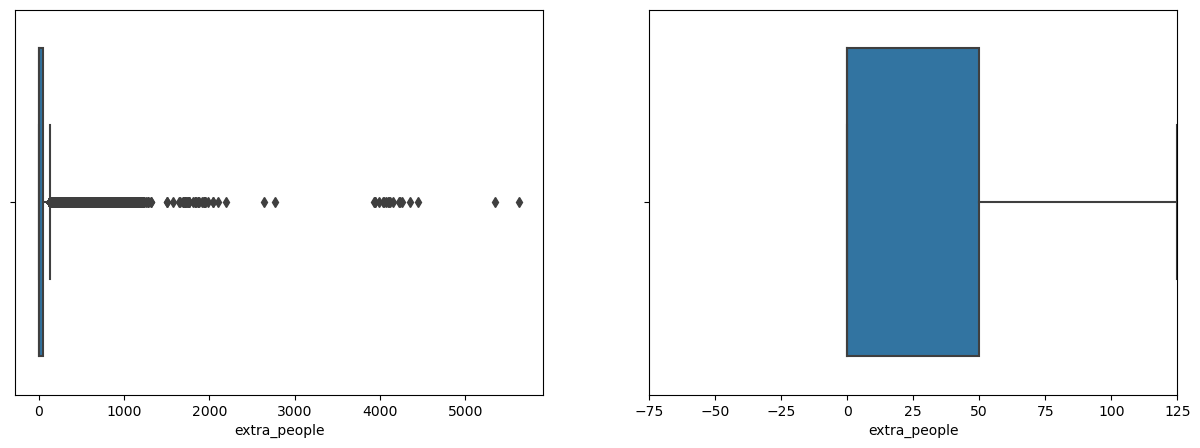

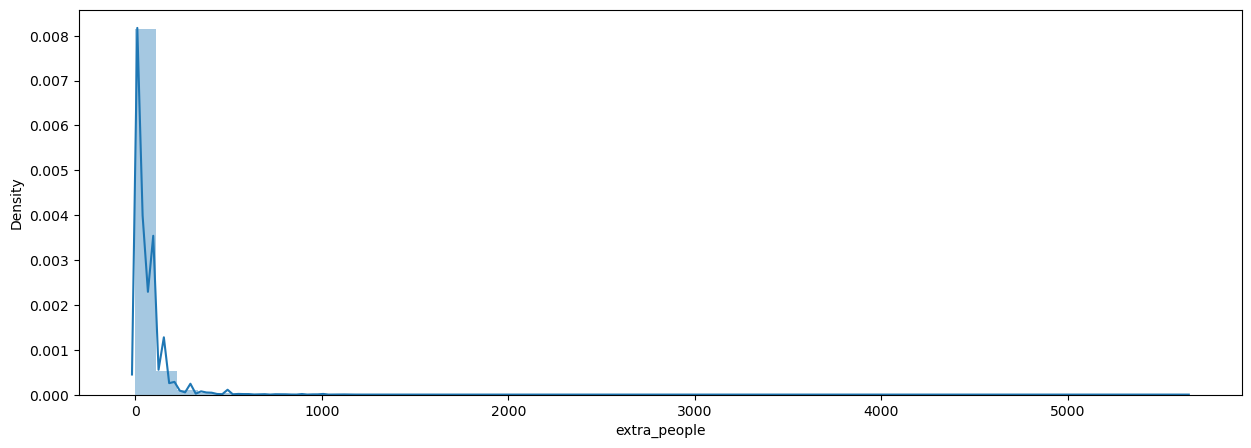

In [74]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [75]:
base_airbnb, linhas_removidas  = excluir_outliers(base_airbnb,'extra_people')
print(f'Foram removidas {linhas_removidas} linhas')

Foram removidas 42939 linhas


C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\1675347531.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




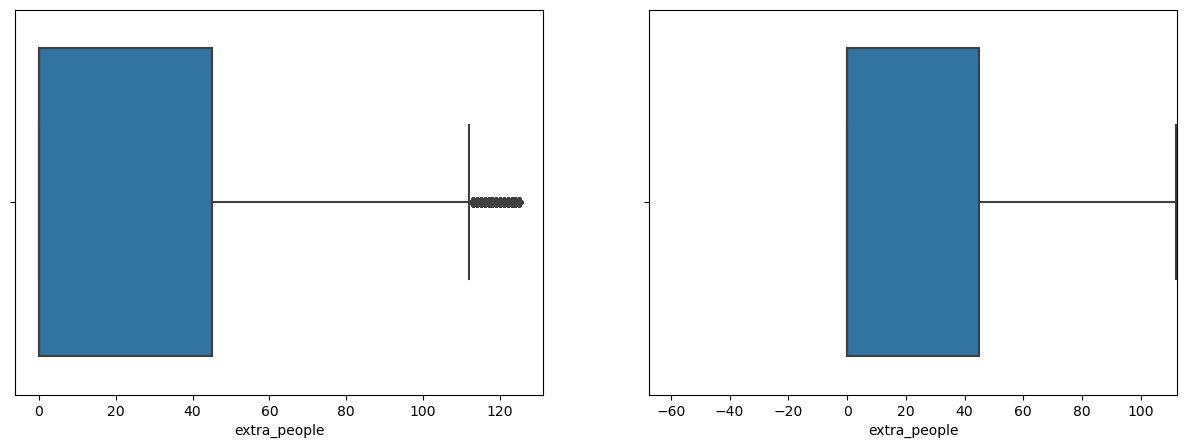

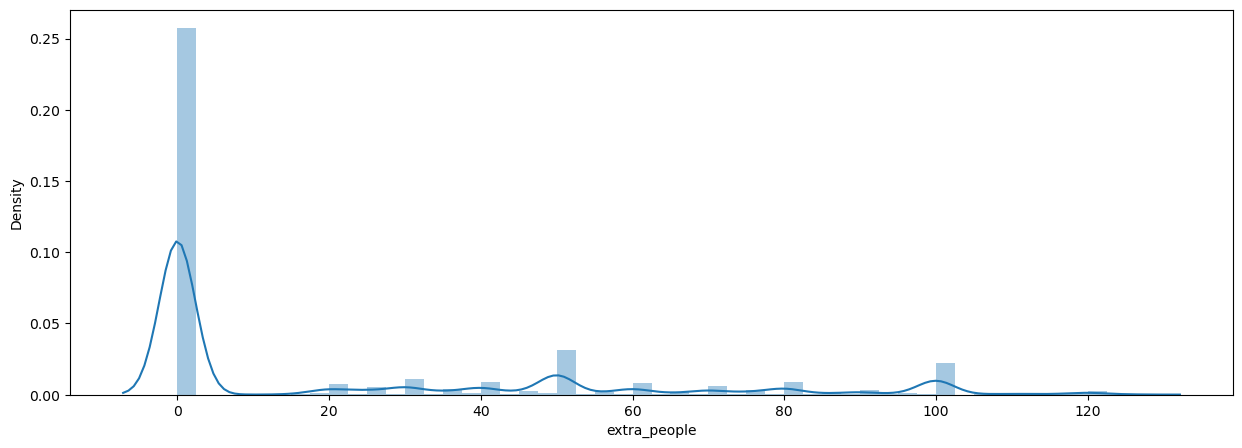

In [76]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

### host_listings_count

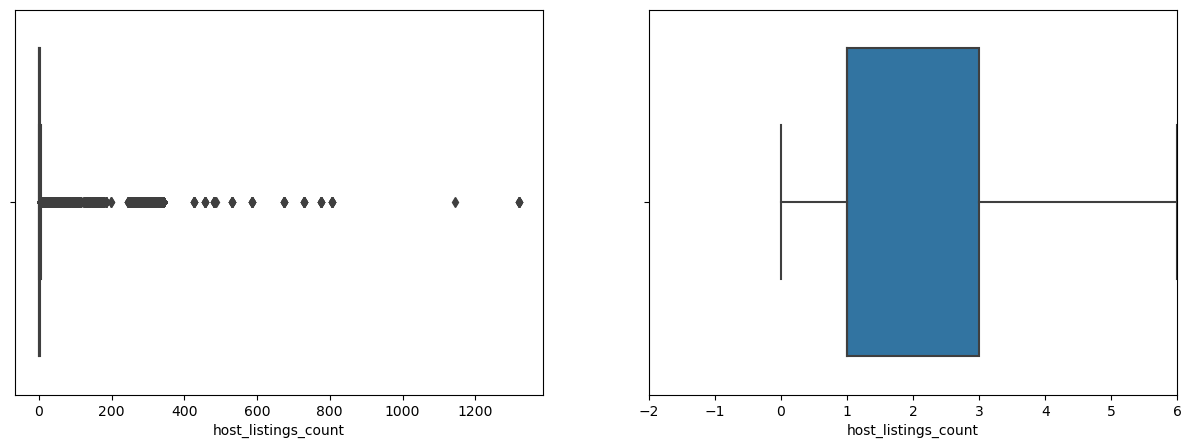

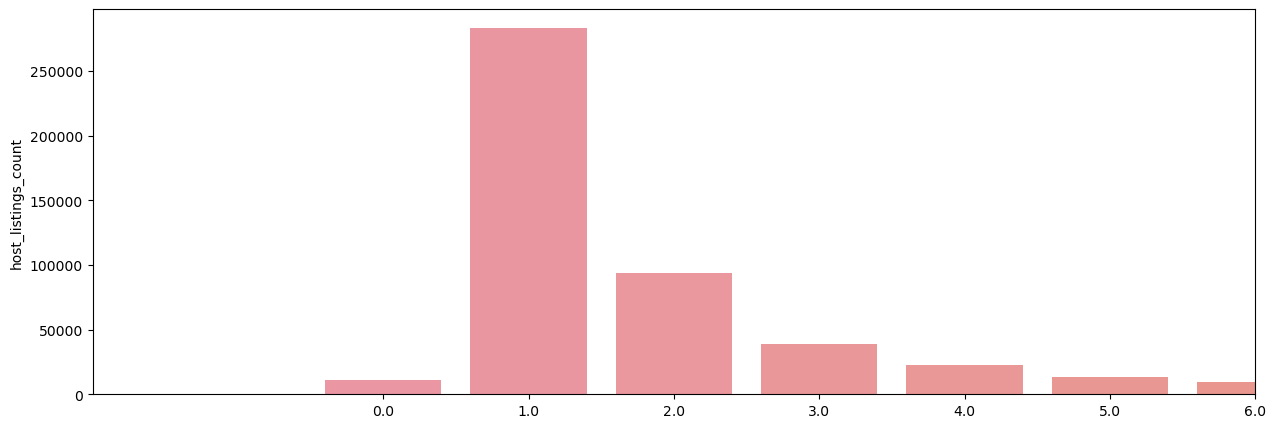

In [77]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

Pode-se excluir os outliers, pois hosts que apresentam 6 imóveis no airbnb não fazem parte do nosso público alvo pois, provavelmente são imobiliários ouprofissionais que gerenciam imóveis no airbnb

In [78]:
base_airbnb, linhas_removidas  = excluir_outliers(base_airbnb,'host_listings_count')
print(f'Foram removidas {linhas_removidas} linhas')

Foram removidas 71630 linhas


### accommodates

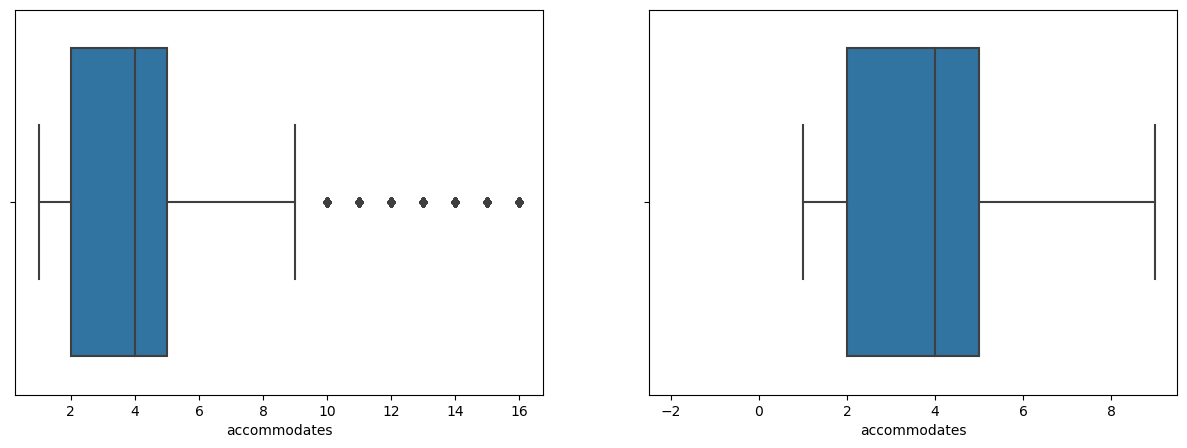

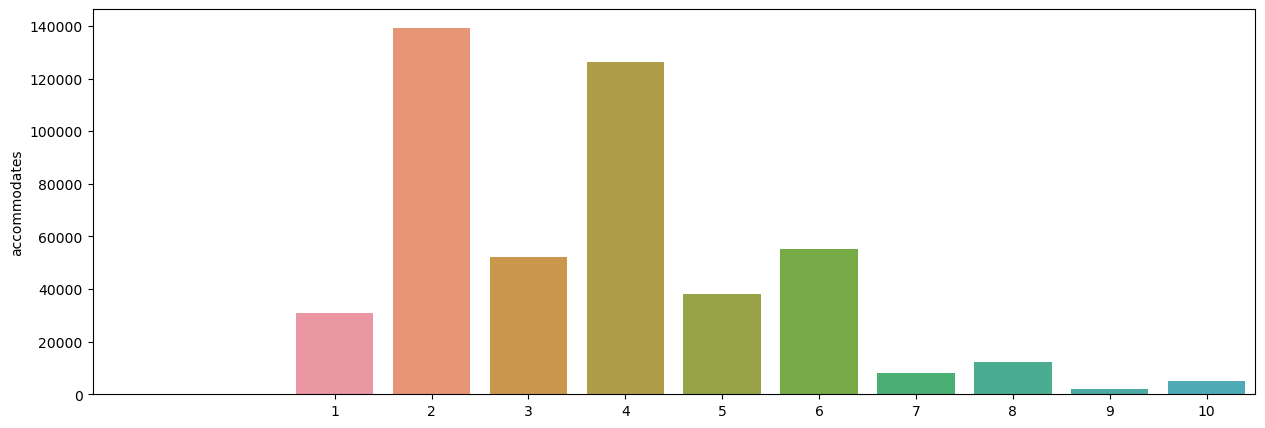

In [79]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

In [80]:
base_airbnb, linhas_removidas  = excluir_outliers(base_airbnb,'accommodates')
print(f'Foram removidas {linhas_removidas} linhas')

Foram removidas 9544 linhas


Como os outliers nesse caso eram muito pequenos, decidi excluí-los para uma consolidar melhor a nossa coluna

### bathrooms

<Axes: ylabel='bathrooms'>

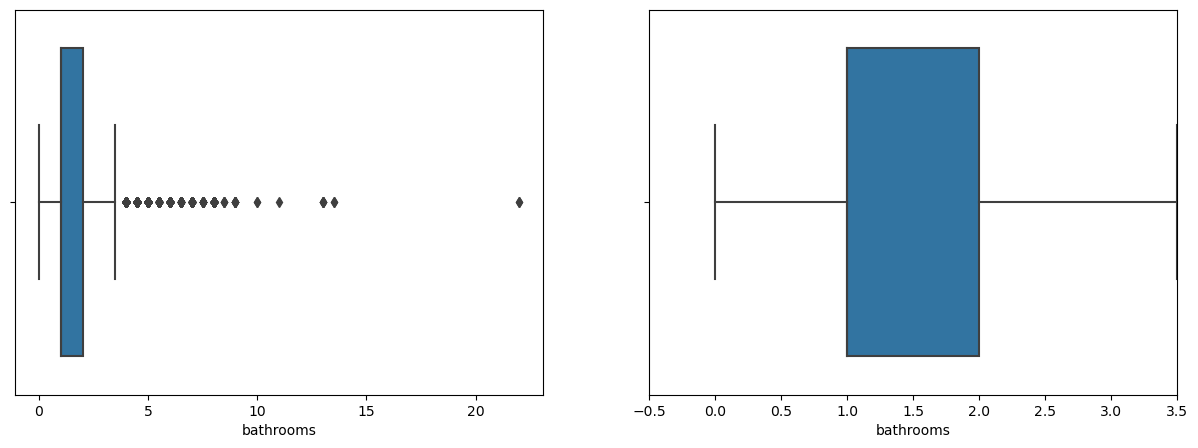

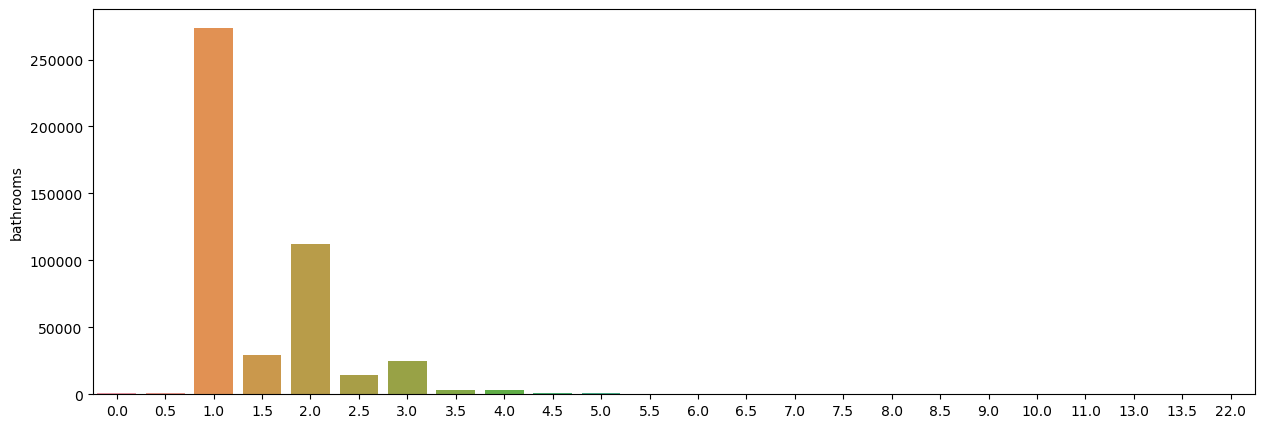

In [81]:
diagrama_caixa(base_airbnb['bathrooms'])
plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index,y=base_airbnb['bathrooms'].value_counts())

In [82]:
base_airbnb, linhas_removidas  = excluir_outliers(base_airbnb,'bathrooms')
print(f'Foram removidas {linhas_removidas} linhas')

Foram removidas 4971 linhas


Nesse caso fizemos um gráfico específico, pois com os limites da função, o gráfico não ficava bom visualmente. E decidi excluir os outliers, por conta da sua pouca quantiadade

### bedrooms

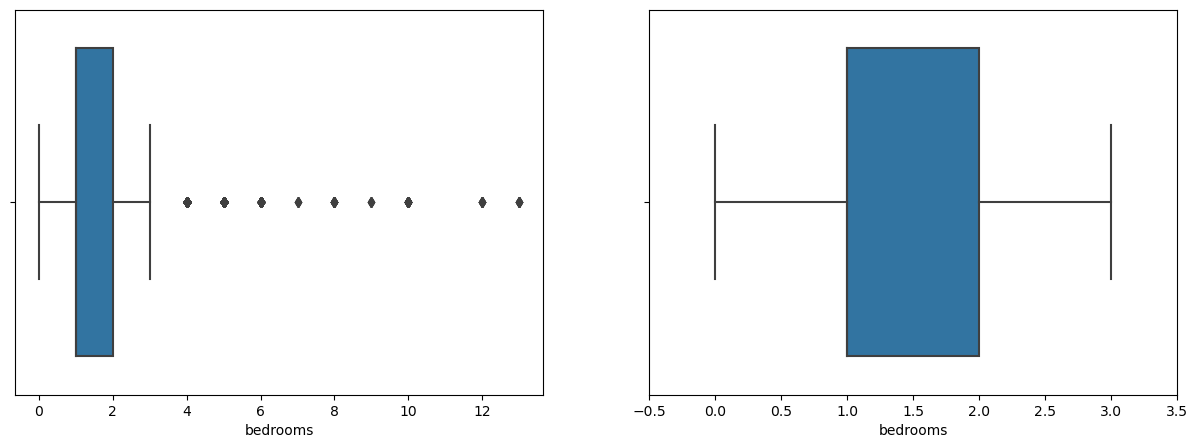

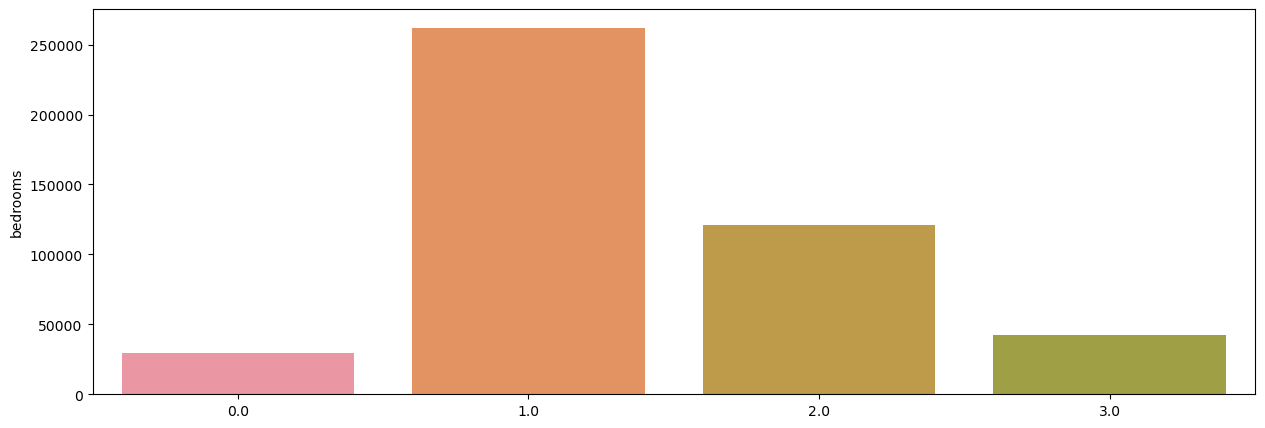

In [83]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

In [84]:
base_airbnb, linhas_removidas  = excluir_outliers(base_airbnb,'bedrooms')
print(f'Foram removidas {linhas_removidas} linhas')

Foram removidas 4003 linhas


Foram removidos os outliers, pois eles eram insiginificantes em quantidade

### beds

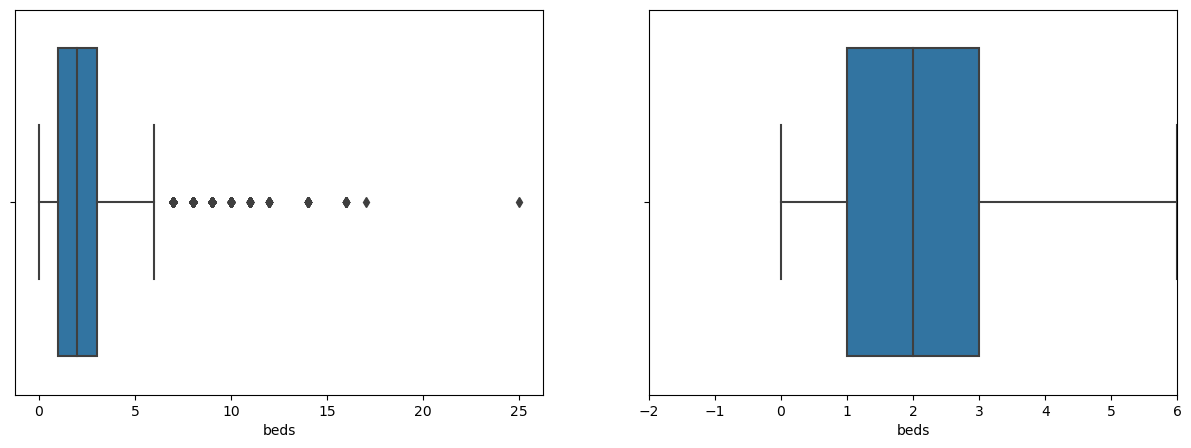

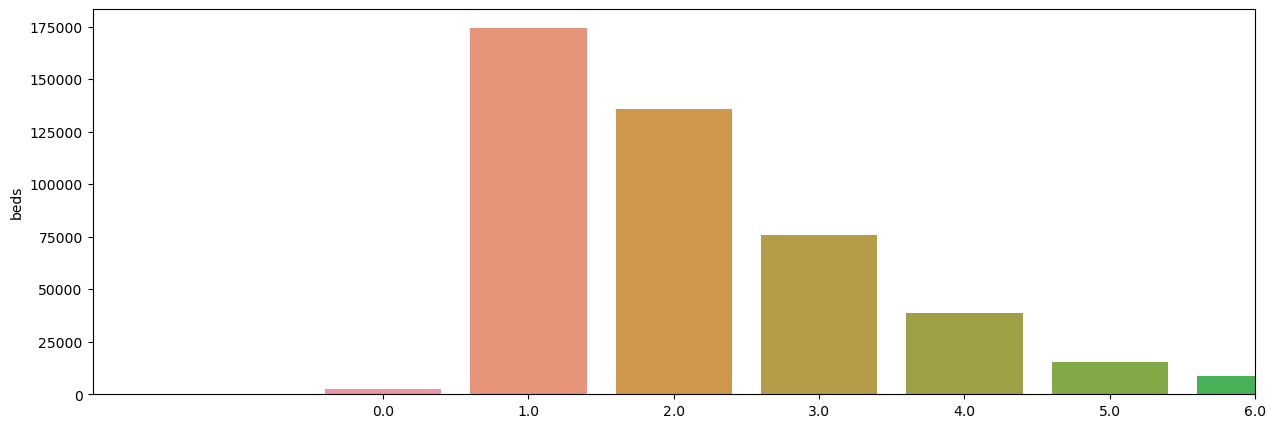

In [85]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

In [86]:
base_airbnb, linhas_removidas  = excluir_outliers(base_airbnb,'beds')
print(f'Foram removidas {linhas_removidas} linhas')

Foram removidas 4094 linhas


Foram removidos os outliers, pois eles eram insiginificantes em quantidade

### guests_included

C:\Users\Bruno\AppData\Local\Temp\ipykernel_21316\1675347531.py:5: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



<Axes: ylabel='guests_included'>

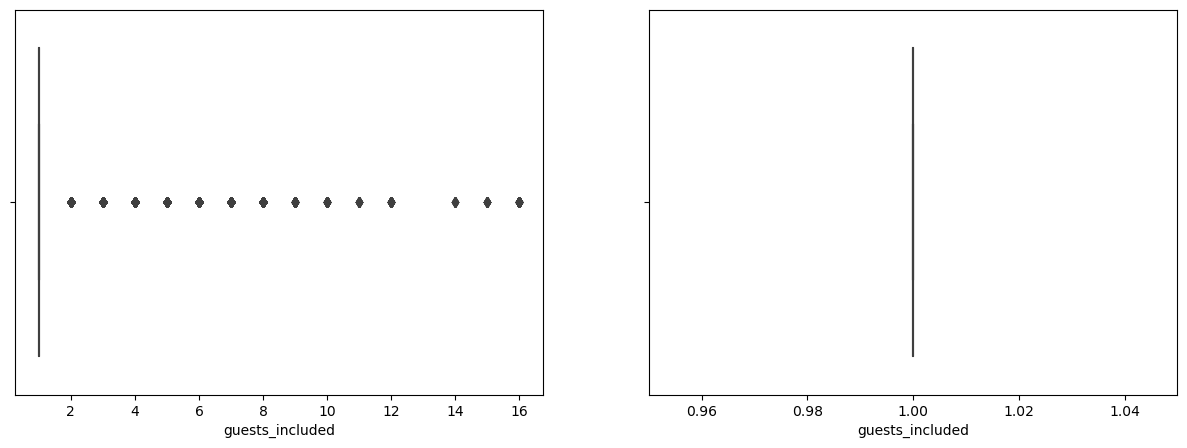

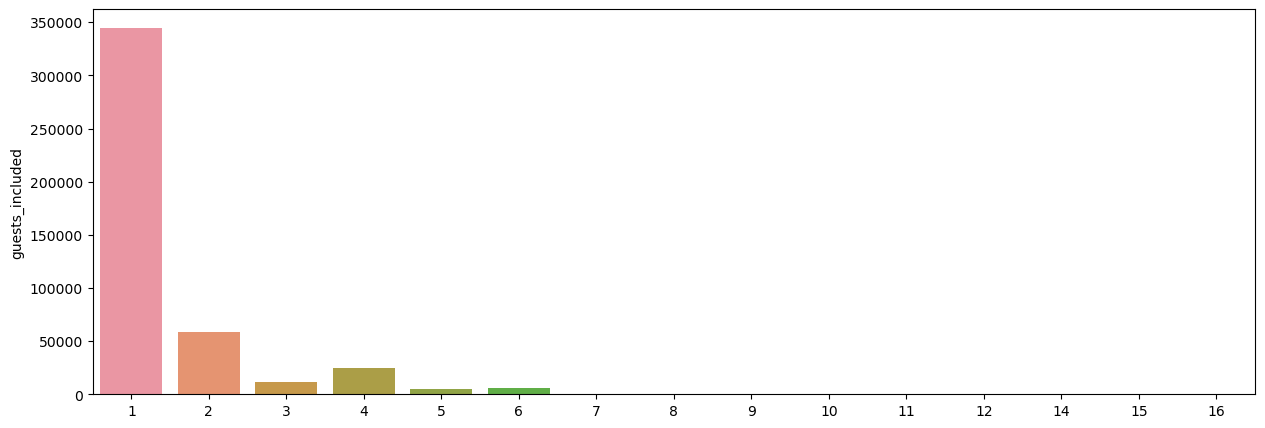

In [87]:
diagrama_caixa(base_airbnb['guests_included'])
plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index,y=base_airbnb['guests_included'].value_counts())

Essa feature será removida da análise, pois parace que os usuários do airbnb quase sempre usam o valor padrão, logo, nosso modelo pode considerar uma feature que não é essencial para a determinação do preço.

In [88]:
base_airbnb = base_airbnb.drop('guests_included',axis=1)
base_airbnb.shape

(451321, 22)

### minimum_nights

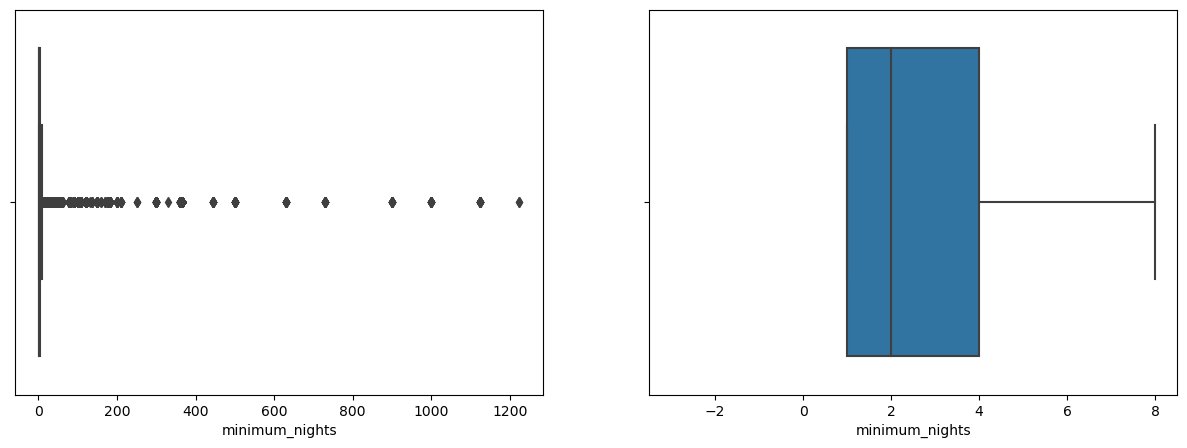

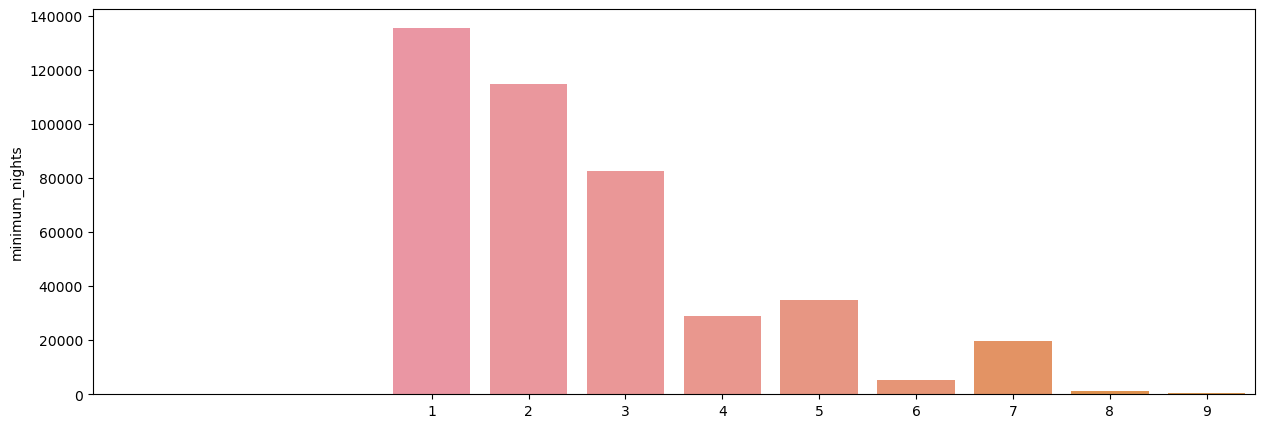

In [89]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

In [90]:
base_airbnb, linhas_removidas  = excluir_outliers(base_airbnb,'minimum_nights')
print(f'Foram removidas {linhas_removidas} linhas')

Foram removidas 28944 linhas


### maximum_nights

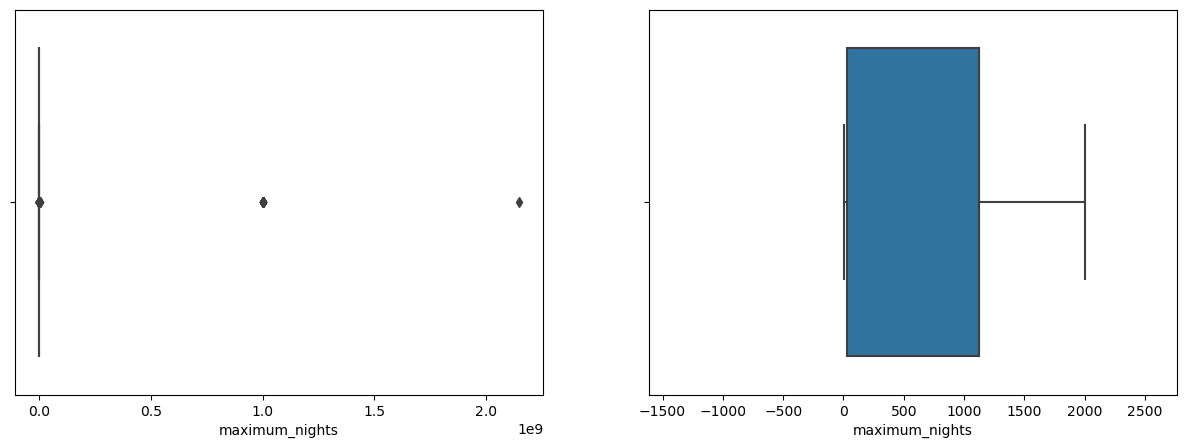

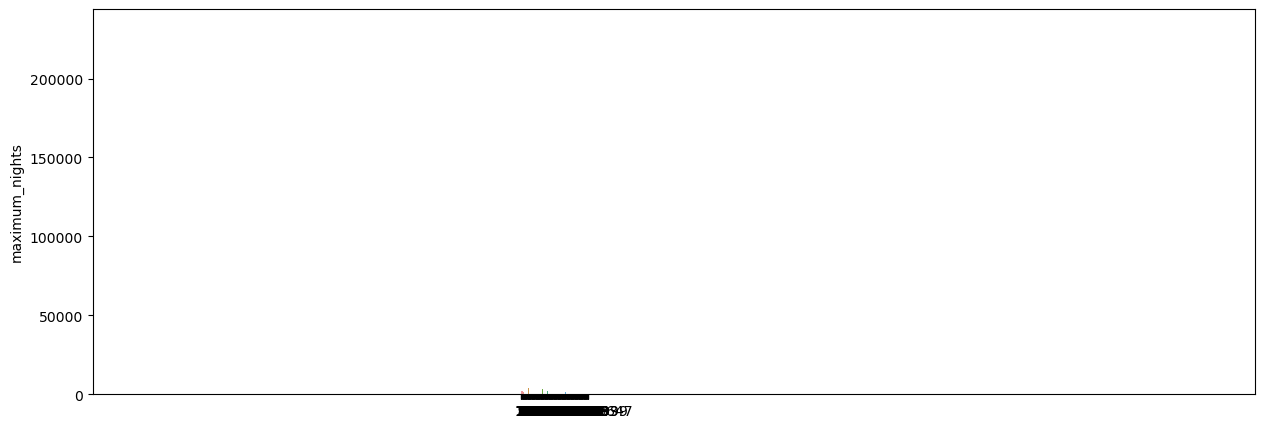

In [91]:
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

Essa feature será removida da análise, pois parace que os usuários do airbnb quase sempre usam o valor padrão ou não preenchem esse campo, logo, nosso modelo pode considerar uma feature que não é essencial para a determinação do preço.

In [92]:
base_airbnb = base_airbnb.drop('maximum_nights',axis=1)
base_airbnb.shape

(422377, 21)

### number_of_reviews

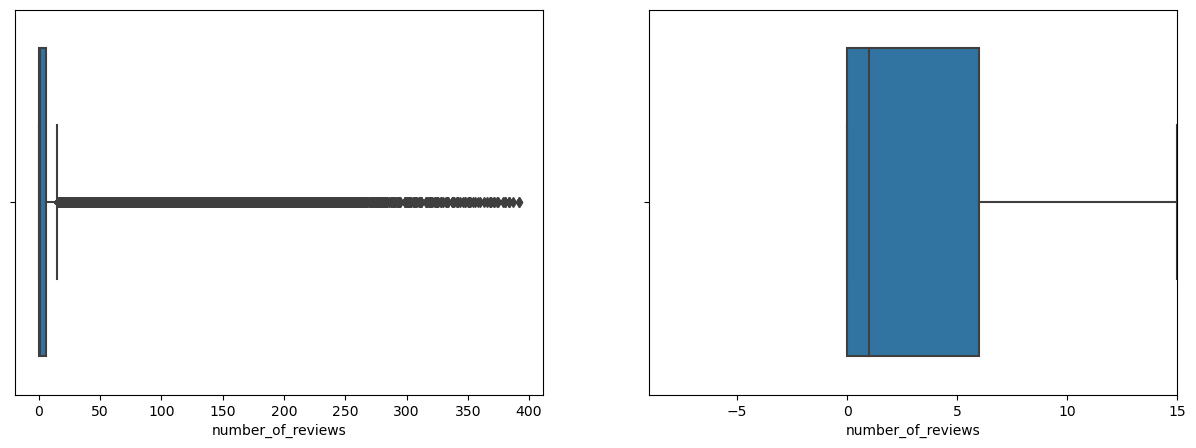

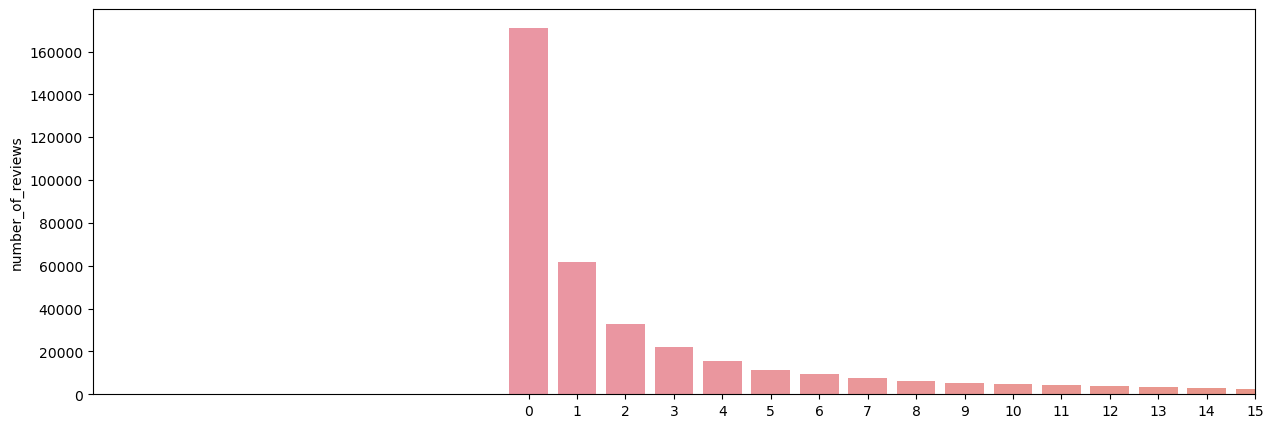

In [93]:
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

Iremos excluir essa feature da nossa análise, pois não quero considerar o número desse reviews, pois a estimativa de preço vai ser voltada para alguém que ainda não tem imóvel no airbnb, logo, não possui reviews

In [94]:
base_airbnb = base_airbnb.drop('number_of_reviews',axis=1)
base_airbnb.shape

(422377, 20)

# Tratamento de Features com valores de Texto

Inicialmente, iremos tratar as colunas com textos muito específicos, ou seja, as colunas:

	• property_type
	• room_type
	• bed_type
    • cancellation_policy
	• amenites

### property_type

Apartment                 333152
House                      37092
Condominium                18754
Serviced apartment          9278
Loft                        8990
Guest suite                 2593
Bed and breakfast           2557
Hostel                      1996
Guesthouse                  1538
Other                       1438
Villa                        905
Townhouse                    693
Aparthotel                   487
Earth house                  339
Tiny house                   338
Chalet                       337
Boutique hotel               316
Hotel                        275
Casa particular (Cuba)       241
Dorm                         174
Cottage                      173
Bungalow                     151
Cabin                        101
Nature lodge                  83
Treehouse                     52
Castle                        46
Boat                          41
Island                        38
Hut                           27
Campsite                      26
Resort    

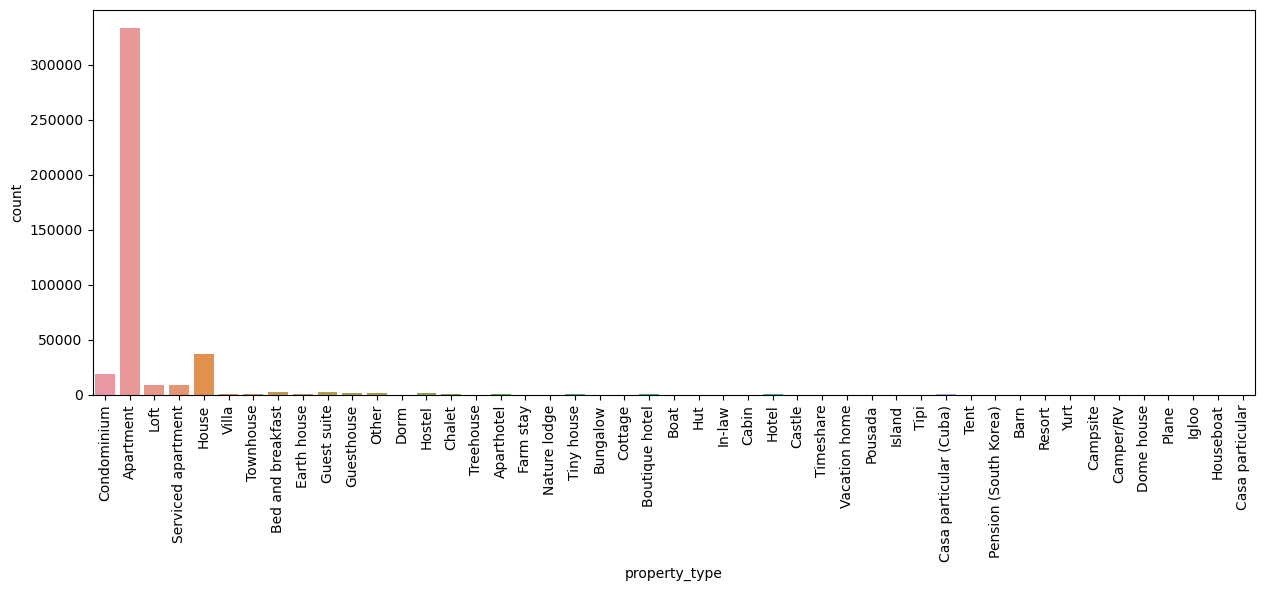

In [95]:
print(base_airbnb['property_type'].value_counts())

plt.figure(figsize = (15,5))
grafico = sns.countplot(x='property_type',data=base_airbnb)
grafico.tick_params(axis='x',rotation=90)

In [96]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()

quantidade_others = np.array(base_airbnb['property_type'][base_airbnb['property_type'] == 'Other'].value_counts())

colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] <= quantidade_others:
        colunas_agrupar.append(tipo)
        
print(colunas_agrupar)

for tipo in colunas_agrupar:
     base_airbnb.loc[base_airbnb['property_type'] == tipo,'property_type'] = 'Outros'
    
print(base_airbnb['property_type'].value_counts())

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Earth house', 'Tiny house', 'Chalet', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Dorm', 'Cottage', 'Bungalow', 'Cabin', 'Nature lodge', 'Treehouse', 'Castle', 'Boat', 'Island', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tipi', 'Tent', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'In-law', 'Vacation home', 'Pousada', 'Timeshare', 'Igloo', 'Houseboat', 'Plane', 'Casa particular']
Apartment             333152
House                  37092
Condominium            18754
Serviced apartment      9278
Loft                    8990
Outros                  6427
Guest suite             2593
Bed and breakfast       2557
Hostel                  1996
Guesthouse              1538
Name: property_type, dtype: int64


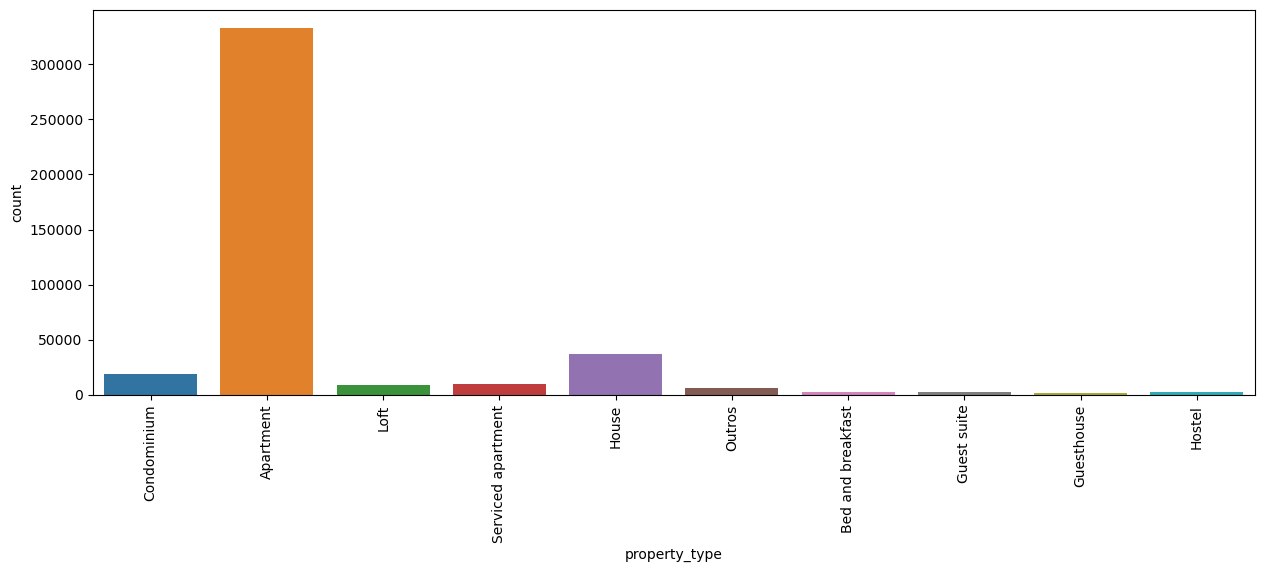

In [97]:
plt.figure(figsize = (15,5))
grafico = sns.countplot(x='property_type',data=base_airbnb)
grafico.tick_params(axis='x',rotation=90)

### room_type

Entire home/apt    271072
Private room       142301
Shared room          8544
Hotel room            460
Name: room_type, dtype: int64


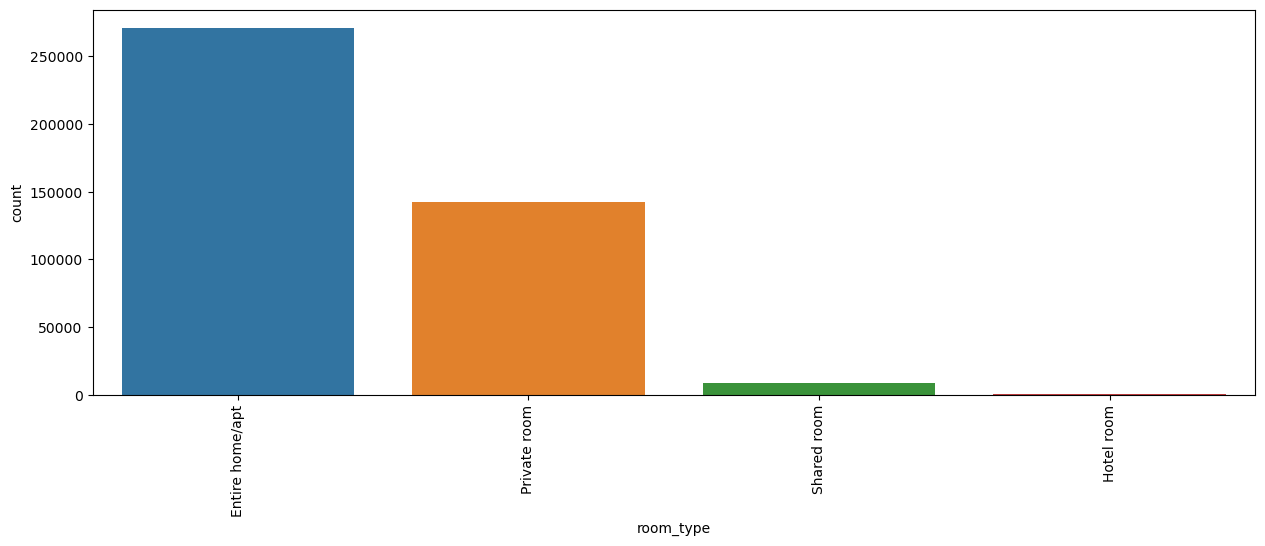

In [98]:
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize = (15,5))
grafico = sns.countplot(x='room_type',data=base_airbnb)
grafico.tick_params(axis='x',rotation=90)

Após a análise, não vi motivo para juntar alguma coluna, pois todas são colunas distintas e importantes para o projeto

### bed_type

Real Bed         414175
Pull-out Sofa      5834
Futon              1183
Airbed              829
Couch               356
Name: bed_type, dtype: int64


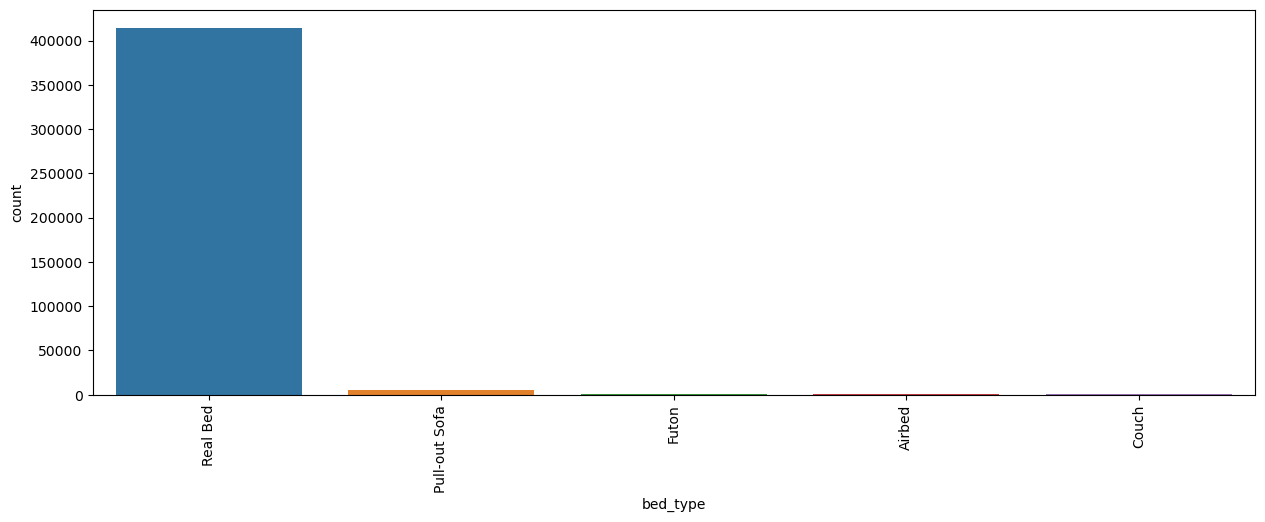

In [99]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize = (15,5))
grafico = sns.countplot(x='bed_type',data=base_airbnb)
grafico.tick_params(axis='x',rotation=90)

In [100]:
tabela_tipo_camas = base_airbnb['bed_type'].value_counts()

colunas_agrupar = []

for tipo in tabela_tipo_camas.index:
    if tipo != 'Real Bed':
        colunas_agrupar.append(tipo)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['bed_type'] == tipo,'bed_type'] = 'Outros'

Real Bed    414175
Outros        8202
Name: bed_type, dtype: int64


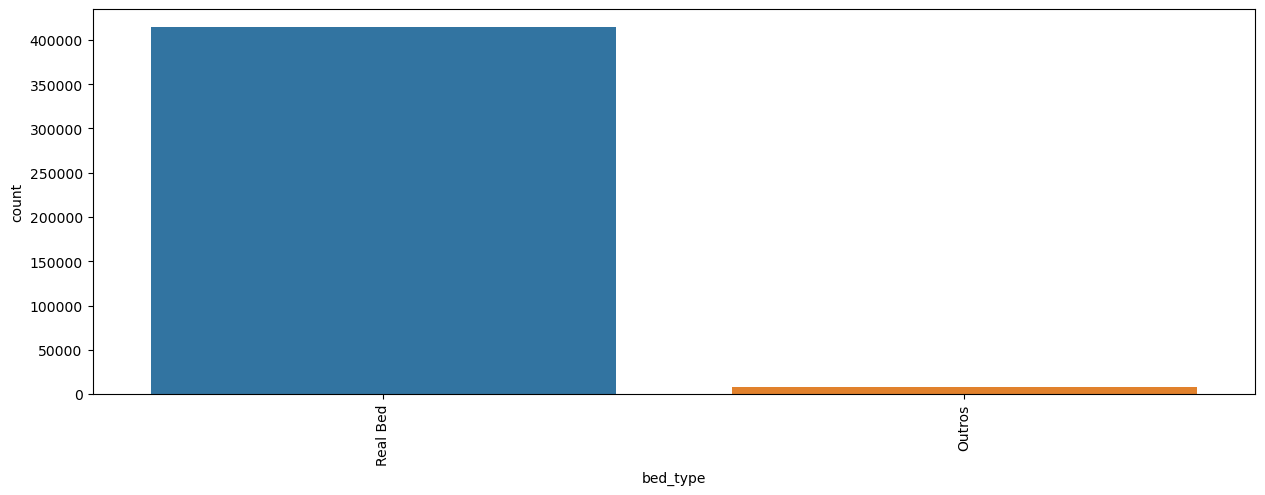

In [101]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize = (15,5))
grafico = sns.countplot(x='bed_type',data=base_airbnb)
grafico.tick_params(axis='x',rotation=90)

### cancellation_policy 

flexible                       186992
strict_14_with_grace_period    143294
moderate                        82277
strict                           9688
super_strict_60                   107
super_strict_30                    19
Name: cancellation_policy, dtype: int64


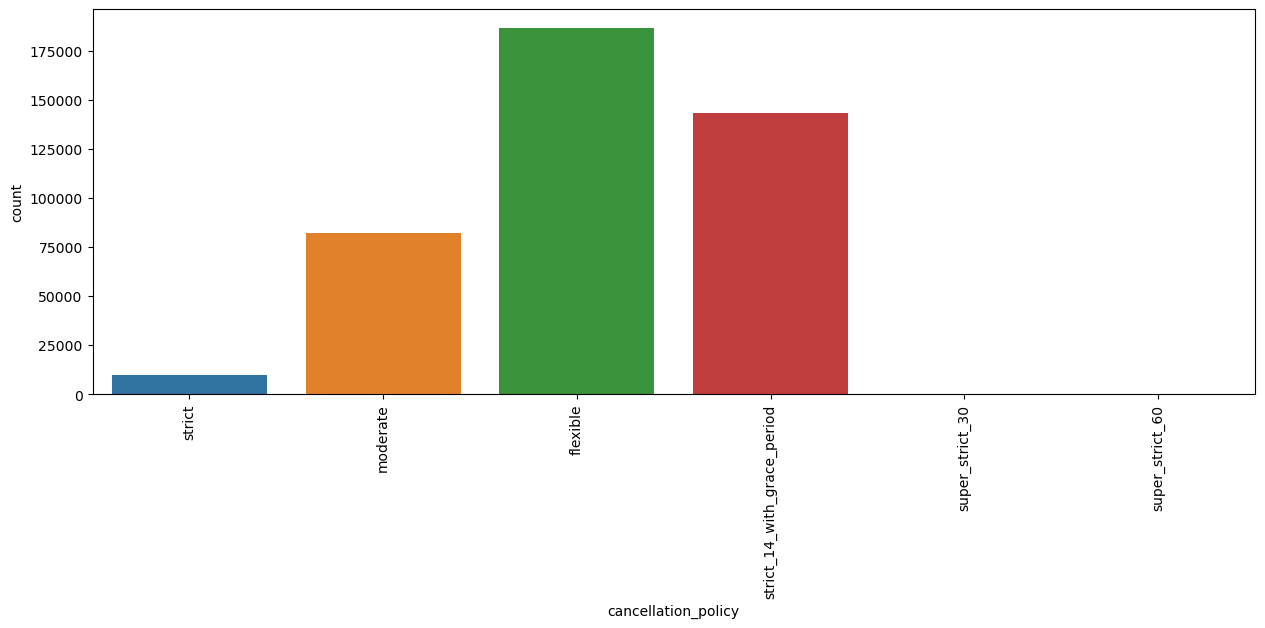

In [102]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize = (15,5))
grafico = sns.countplot(x='cancellation_policy',data=base_airbnb)
grafico.tick_params(axis='x',rotation=90)

In [103]:
tabela_politica_cancelamento = base_airbnb['cancellation_policy'].value_counts()

quantidade_strict = np.array(base_airbnb['cancellation_policy'][base_airbnb['cancellation_policy'] == 'strict'].value_counts())

colunas_agrupar = []

for tipo in tabela_politica_cancelamento.index:
    if tabela_politica_cancelamento[tipo] <= quantidade_strict:
        colunas_agrupar.append(tipo)

for tipo in colunas_agrupar:
     base_airbnb.loc[base_airbnb['cancellation_policy'] == tipo,'cancellation_policy'] = 'strict'

flexible                       186992
strict_14_with_grace_period    143294
moderate                        82277
strict                           9814
Name: cancellation_policy, dtype: int64


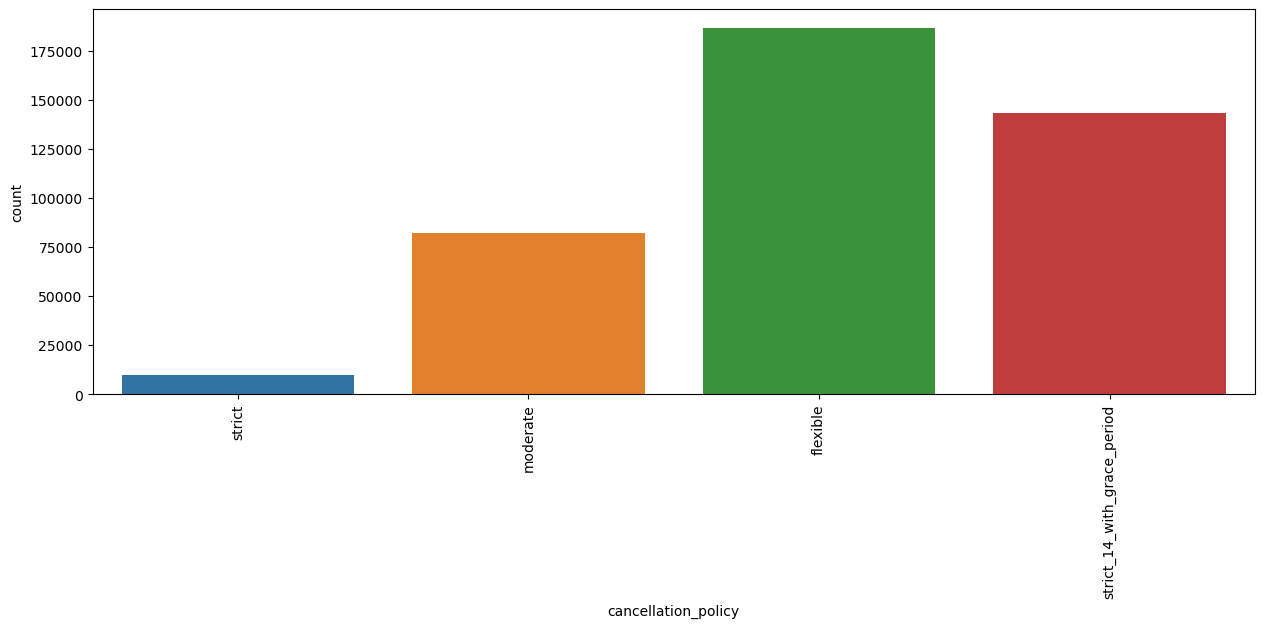

In [104]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize = (15,5))
grafico = sns.countplot(x='cancellation_policy',data=base_airbnb)
grafico.tick_params(axis='x',rotation=90)

### amenities

Os amenities são as comodidades dos imóveis, ou seja, especificações sobre o ambiente. O problema é que a lista por si só é muito confusa e seus itens não seguem um padrão, pois é o host que escreve da forma que ele preferir. Logo, não iremos analisar os amenities em si mas sim a sua quantidade, vamos sair no pressuposto de que quanto mais especificações, mais caro é o imóvel.

Vamos criar uma coluna que conta a quantidade de amenities e depois, excluiremos a coluna de amenities

In [105]:
base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

base_airbnb = base_airbnb.drop('amenities',axis=1)

base_airbnb.shape

(422377, 20)

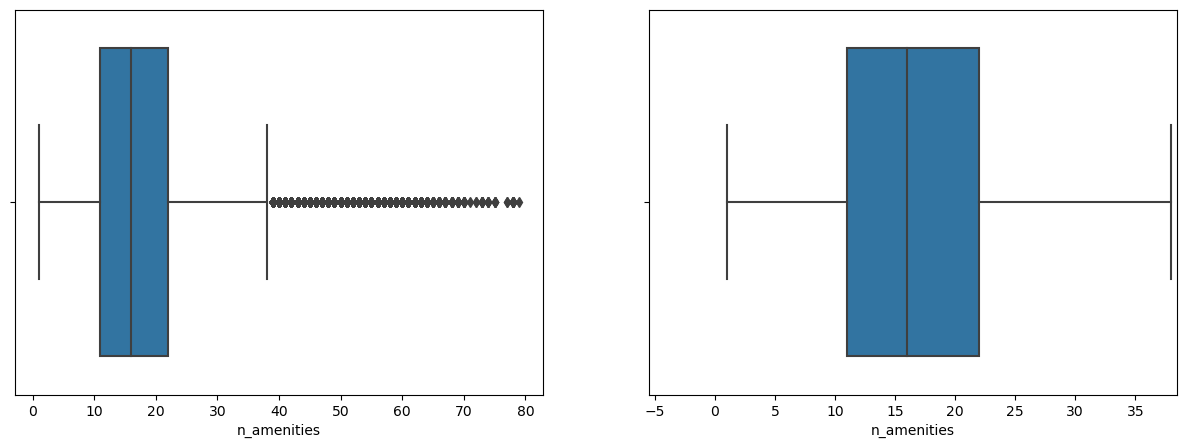

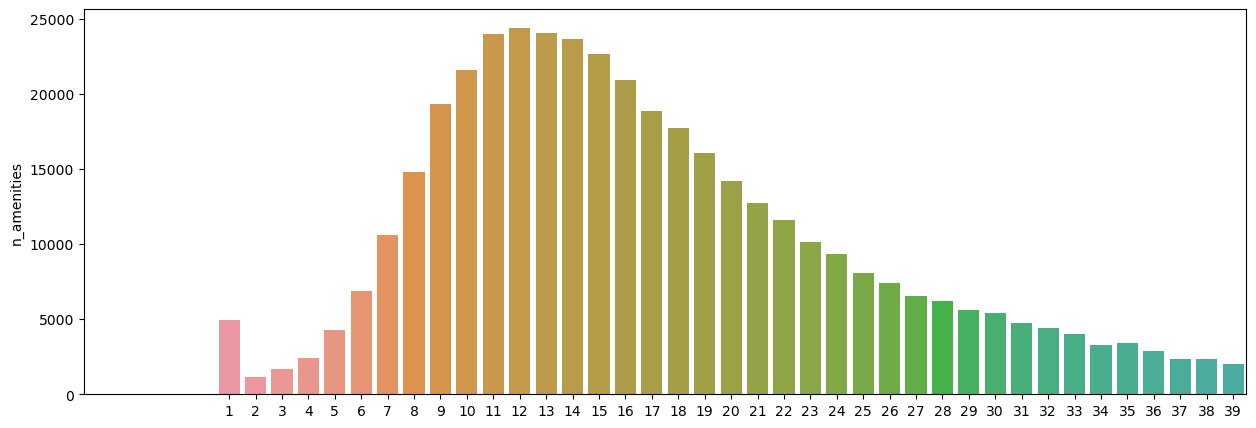

In [106]:
diagrama_caixa(base_airbnb['n_amenities'])
grafico_barra(base_airbnb['n_amenities'])

In [107]:
base_airbnb, linhas_removidas  = excluir_outliers(base_airbnb,'n_amenities')
print(f'Foram removidas {linhas_removidas} linhas')

Foram removidas 17072 linhas


### Visualização de Mapa

In [1]:
amostra = base_airbnb.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude',z='price',radius=2.5,
                       center = centro_mapa, zoom=10,
                       mapbox_style = 'dark')

mapa.show()


NameError: name 'base_airbnb' is not defined

### Encoding

É necessário o ajuste das features para facilitar o trabalho do modelo

 - Features true ou false, irão ser substituídas por 1 e 0 respectivamente
 - Features de categoria (features de texto) será realizado o enconding por váriáveis dummies

In [109]:
display(base_airbnb)

,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,extra_people,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes,n_amenities
1,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,270.0,51.0,4,t,f,strict,2018,4,25
3,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,161.0,45.0,4,f,f,strict,2018,4,14
4,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,222.0,68.0,2,t,f,strict,2018,4,16
5,t,1.0,-22.988165,-43.193588,Apartment,Entire home/apt,3,1.5,1.0,2.0,Real Bed,308.0,86.0,2,f,f,strict,2018,4,30
6,t,1.0,-22.981269,-43.190457,Loft,Entire home/apt,2,1.0,1.0,2.0,Real Bed,219.0,80.0,3,t,f,strict,2018,4,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,f,2.0,-23.005750,-43.340610,Serviced apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,119.0,0.0,1,f,f,strict_14_with_grace_period,2019,3,13
36370,f,3.0,-23.013380,-43.303610,Condominium,Entire home/apt,4,3.0,2.0,2.0,Real Bed,501.0,0.0,2,t,f,flexible,2019,3,21
36371,f,3.0,-22.938510,-43.198730,House,Private room,2,1.0,1.0,2.0,Real Bed,310.0,110.0,1,f,f,flexible,2019,3,11
36373,f,1.0,-23.026120,-43.464980,Condominium,Entire home/apt,6,2.5,2.0,2.0,Real Bed,451.0,0.0,3,t,f,flexible,2019,3,14


In [110]:
colunas_tf = ['host_is_superhost','instant_bookable','is_business_travel_ready']
base_airbnb_cod = base_airbnb.copy()

for coluna in colunas_tf:
    base_airbnb_cod.loc[base_airbnb_cod[coluna] == 'f',coluna] = 0
    base_airbnb_cod.loc[base_airbnb_cod[coluna] == 't',coluna] = 1


In [111]:
colunas_categoria = ['property_type','room_type','bed_type','cancellation_policy']

base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod,columns = colunas_categoria)

display(base_airbnb_cod)

,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,extra_people,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Outros,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period
1,1,2.0,-22.965919,-43.178962,5,1.0,2.0,2.0,270.0,51.0,...,1,0,0,0,0,1,0,0,1,0
3,0,3.0,-22.977117,-43.190454,3,1.0,1.0,2.0,161.0,45.0,...,1,0,0,0,0,1,0,0,1,0
4,1,1.0,-22.983024,-43.214270,3,1.0,1.0,2.0,222.0,68.0,...,1,0,0,0,0,1,0,0,1,0
5,1,1.0,-22.988165,-43.193588,3,1.5,1.0,2.0,308.0,86.0,...,1,0,0,0,0,1,0,0,1,0
6,1,1.0,-22.981269,-43.190457,2,1.0,1.0,2.0,219.0,80.0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,0,2.0,-23.005750,-43.340610,2,1.0,1.0,2.0,119.0,0.0,...,1,0,0,0,0,1,0,0,0,1
36370,0,3.0,-23.013380,-43.303610,4,3.0,2.0,2.0,501.0,0.0,...,1,0,0,0,0,1,1,0,0,0
36371,0,3.0,-22.938510,-43.198730,2,1.0,1.0,2.0,310.0,110.0,...,0,0,1,0,0,1,1,0,0,0
36373,0,1.0,-23.026120,-43.464980,6,2.5,2.0,2.0,451.0,0.0,...,1,0,0,0,0,1,1,0,0,0


### Modelo de Previsão

Métricas de avaliação

In [112]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

- Escolhas dos modelos a serem testados

    1. RandomForest
    2. LinearRegression
    3. Extra Tree

In [113]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf,
          'LinearRegressor': modelo_lr,
          'ExtraTrees': modelo_et
          }

y = base_airbnb_cod['price']
x = base_airbnb_cod.drop('price', axis=1)

- Separação os dados em treino e etste + Treino do Modelo

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(x_train,y_train)
    #testar
    previsao = modelo.predict(x_test)
    print(avaliar_modelo(nome_modelo,y_test,previsao))

Modelo RandomForest:
R²:96.16%
RSME:51.57
Modelo LinearRegressor:
R²:32.74%
RSME:215.76
Modelo ExtraTrees:
R²:96.39%
RSME:49.95


- ExtraTressRegressor foi o modelo escolhido

    Esse é o modelos escolhido pois é o que entrega o maior R² e ao mesmo tempo o menor RSME. Como não houve grande diferença    no tempo de treino e de previsão entre esse modelo e o RandomForest(obteve indices de R² e RSME próximos), vamos escolher o     ExtraTrees.
    
    O modelo LinearRegressor não obteve resultados bons, pois teve valores de R² e de RSME muito piores do que os outros 2 modelos restantes.

    Resultados das métricas do modelo vencedor: <br> <br>
    Modelo ExtraTrees:<br>
    R²:96.41%<br>
    RSME:49.85<br>

### Análise do Melhor Modelo

[0.01327389 0.03990355 0.10421044 0.10022219 0.07114506 0.07358009
 0.10881892 0.05273258 0.08468386 0.06562357 0.02182734 0.
 0.01183409 0.0045272  0.08873939 0.01276434 0.00141247 0.00539085
 0.00065195 0.00081406 0.00070536 0.00710851 0.00220771 0.00235228
 0.00243071 0.07074328 0.00029964 0.003532   0.00180768 0.00261808
 0.00263015 0.02005061 0.01268707 0.00105791 0.00761317]
Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'extra_people',
       'minimum_nights', 'instant_bookable', 'is_business_travel_ready', 'ano',
       'mes', 'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel r

,0
host_is_superhost,0.013274
host_listings_count,0.039904
latitude,0.104210
longitude,0.100222
accommodates,0.071145
bathrooms,0.073580
bedrooms,0.108819
beds,0.052733
extra_people,0.084684
minimum_nights,0.065624


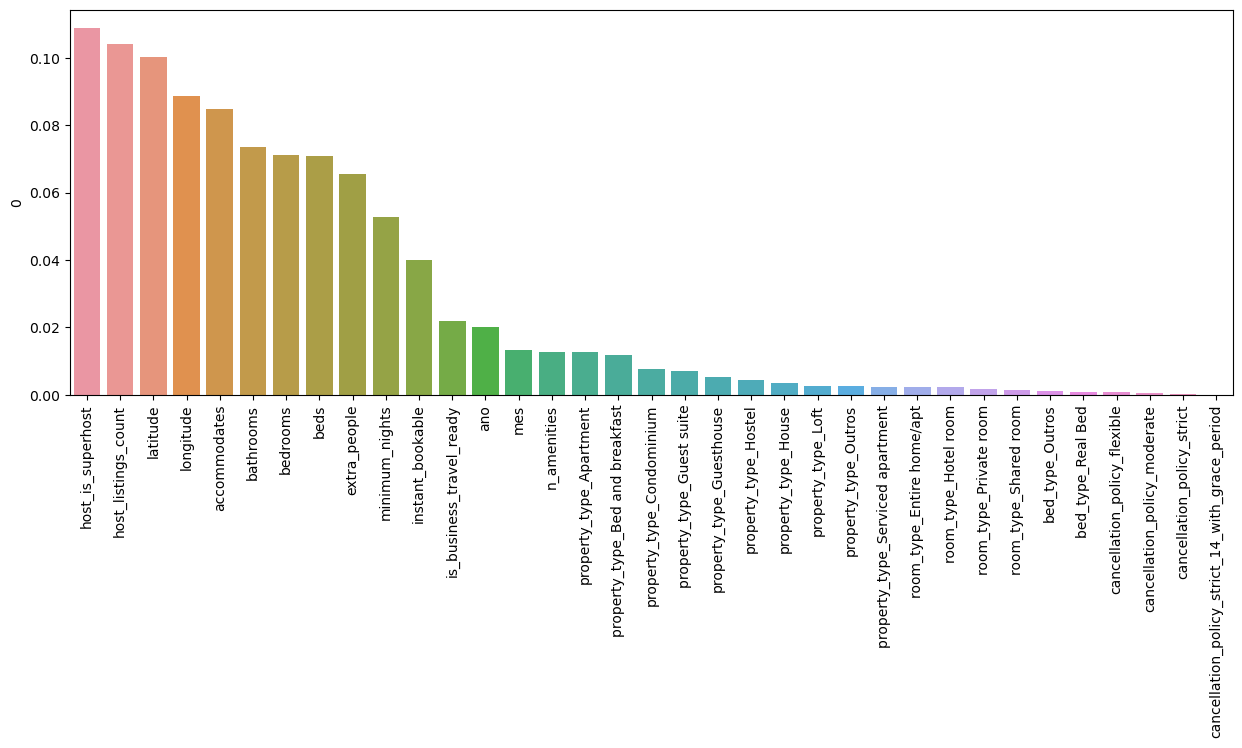

In [115]:
print(modelo_et.feature_importances_)
print(x_train.columns)

importancia_fetures = pd.DataFrame(modelo_et.feature_importances_,x_train.columns)
importancia_features = importancia_fetures.sort_values(by=0, ascending=False)
display(importancia_fetures)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=importancia_fetures.index,y=importancia_features[0])
ax.tick_params(axis='x',rotation=90)

### Ajustes finais do modelo

- Após a avaliação percebe-se que a feature is_business_travel_ready não apresenta importância para o modelo. Logo, para termos um modelo mais simples e eficaz, iremos retirar essa feature do DataFrame

In [116]:
base_airbnb_cod = base_airbnb_cod.drop('is_business_travel_ready',axis=1)

y = base_airbnb_cod['price']

x = base_airbnb_cod.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

#treinar ExtraTrees
modelo_et.fit(x_train,y_train)
#testar
previsao = modelo_et.predict(x_test)
print(avaliar_modelo('ExtraTrees',y_test,previsao))

Modelo ExtraTrees:
R²:96.41%
RSME:49.86


- Podemos analisar que o bed_type também está dividido, mas só em 2 features que não pesam em quase nada em nível de importância para o nosso modelo, logo, podemos retirar elas esperando por um modelo mais simples e com pouca variação no R² e no RSME

In [117]:
#criando uma base teste para testarmos a retirada de features
base_teste = base_airbnb_cod.copy()

for coluna in base_teste:
    if 'bed_type' in coluna:
        base_teste = base_teste.drop(coluna,axis=1)

y = base_teste['price']

x = base_teste.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

#treinar ExtraTrees
modelo_et.fit(x_train,y_train)
#testar
previsao = modelo_et.predict(x_test)
print(avaliar_modelo('ExtraTrees',y_test,previsao))

Modelo ExtraTrees:
R²:96.39%
RSME:49.98


Criando um arquivo CSV somente com as features de índice x (todas, menos a price) da nossa base de dados tratada

In [118]:
x['price'] = y
x.to_csv('dados.csv')

Salvando o nosso modelo em um arquivo joblib para podermos utilizá-lo no deploy do projeto

In [119]:
import joblib
joblib.dump(modelo_et,'modelo.joblib')

['modelo.joblib']